# Mini Project 3

## Answers

- What features/columns had a relatively even or normal distribution? Which features/columns did not?
    - the numerical data in this dataset showed to have a pretty normal appearing distribution. The categorical collums followed a negative patters for the most part.

- How did you handle missing values? Why did you do this method as opposed to others?
    - I comppletely removed missing values because There was no way to fabricate data that would be accurate for things in this dataset, and anything fabricated would be completley untruthful.
- How did you encode your categorical data? Why did you do this method as opposed to others?
    - Since there was no inherent order I used one hot encoding. For one collumn I had to manually encode it because there were multiple different entries per row in that collumn.
- How did you handle removing outliers? Why did you use this method as opposed to others?
    - I used Z score because I could toggle the threshold since the box plots showed that some collums had A LOT of outliers so i figured leaving some wiggle room to keep some "outliers" that are close to other entries that are not outliers.
- How did you normalize/standardize the data? Why did you use this method as opposed to others?
    - I used standardization because it is less succeptable to outliers contrary to normalization.
- How did each model perform? Which performed the best?
    - the best model was linear regression with an r2 score of .43 and SVR was.42. The other so models were sub .2 so they dont havee much predictive power.
- Did any models seem to have a relatively high amount of bias (underfitting)? Variance (overfitting)?

In [254]:
import pandas as pd
import matplotlib.pyplot as plt

In [255]:
data = pd.read_csv('imdb.csv')
data.tail()

id                          primaryTitle  \
3343  tt9770150                             Nomadland   
3344  tt9777666                      The Tomorrow War   
3345  tt9784798           Judas and the Black Messiah   
3346  tt9844522  Escape Room: Tournament of Champions   
3347  tt9893250                          I Care a Lot   

                             originalTitle  isAdult  runtimeMinutes  \
3343                             Nomadland        0             107   
3344                      The Tomorrow War        0             138   
3345           Judas and the Black Messiah        0             126   
3346  Escape Room: Tournament of Champions        0              88   
3347                          I Care a Lot        0             118   

                       genres  averageRating  numVotes     budget       gross  \
3343                    Drama            7.3    175977    5000000  39458207.0   
3344   Action,Adventure,Drama            6.6    220617  200000000  14400000.0   
3345  Biography,Drama,History            7.4     88568   26000000   7478009.0   
3346  Action,Adventure,Horror            5.7     56955   15000000  65774490.0   
3347       Comedy,Crime,Drama            6.4    141433   14000000   1351662.0   

            release_date     directors  
3343  September 11, 2020    Chloé Zhao  
3344       June 30, 2021   Chris McKay  
3345    February 1, 2021    Shaka King  
3346        July 1, 2021  Adam Robitel  
3347  September 12, 2020    J Blakeson

In [256]:
display(data.describe())
display(data.isna().sum())

isAdult  runtimeMinutes  averageRating      numVotes        budget  \
count   3348.0     3348.000000     3348.00000  3.348000e+03  3.348000e+03   
mean       0.0      112.739845        6.73853  2.155492e+05  5.039280e+07   
std        0.0       19.927703        0.88221  2.480211e+05  5.178614e+07   
min        0.0       63.000000        1.00000  5.000400e+04  1.800000e+01   
25%        0.0       98.000000        6.20000  7.897700e+04  1.500000e+07   
50%        0.0      109.000000        6.80000  1.290400e+05  3.200000e+07   
75%        0.0      124.000000        7.30000  2.468495e+05  6.800000e+07   
max        0.0      242.000000        9.30000  2.817283e+06  3.560000e+08   

              gross  
count  3.297000e+03  
mean   1.681599e+08  
std    2.366507e+08  
min    2.100000e+02  
25%    3.623022e+07  
50%    8.821516e+07  
75%    2.008117e+08  
max    2.923706e+09

id                 0
primaryTitle       0
originalTitle      0
isAdult            0
runtimeMinutes     0
genres             0
averageRating      0
numVotes           0
budget             0
gross             51
release_date       5
directors          0
dtype: int64

In [257]:
categorical = ['primaryTitle','originalTitle','genres','release_date','directors']
numerical = ['isAdult','runtimeMinutes','averageRating','numVotes','budget','gross']

In [258]:
data = data.dropna()
display(data.describe())
display(data.isna().sum())

isAdult  runtimeMinutes  averageRating      numVotes        budget  \
count   3292.0     3292.000000    3292.000000  3.292000e+03  3.292000e+03   
mean       0.0      112.733597       6.741403  2.170898e+05  5.046317e+07   
std        0.0       19.810446       0.881473  2.494723e+05  5.179130e+07   
min        0.0       63.000000       1.000000  5.000400e+04  1.800000e+01   
25%        0.0       98.000000       6.200000  7.939600e+04  1.500000e+07   
50%        0.0      109.000000       6.800000  1.297150e+05  3.200000e+07   
75%        0.0      124.000000       7.300000  2.490032e+05  6.800000e+07   
max        0.0      229.000000       9.300000  2.817283e+06  3.560000e+08   

              gross  
count  3.292000e+03  
mean   1.682646e+08  
std    2.367528e+08  
min    2.100000e+02  
25%    3.628330e+07  
50%    8.843429e+07  
75%    2.009951e+08  
max    2.923706e+09

id                0
primaryTitle      0
originalTitle     0
isAdult           0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
budget            0
gross             0
release_date      0
directors         0
dtype: int64

In [259]:
#bar graph maker

def makeBarValueCount(aDF, colName):
    aDF[colName].value_counts().plot(kind='bar', figsize=(70, 6))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"The Count in the {colName} Column")

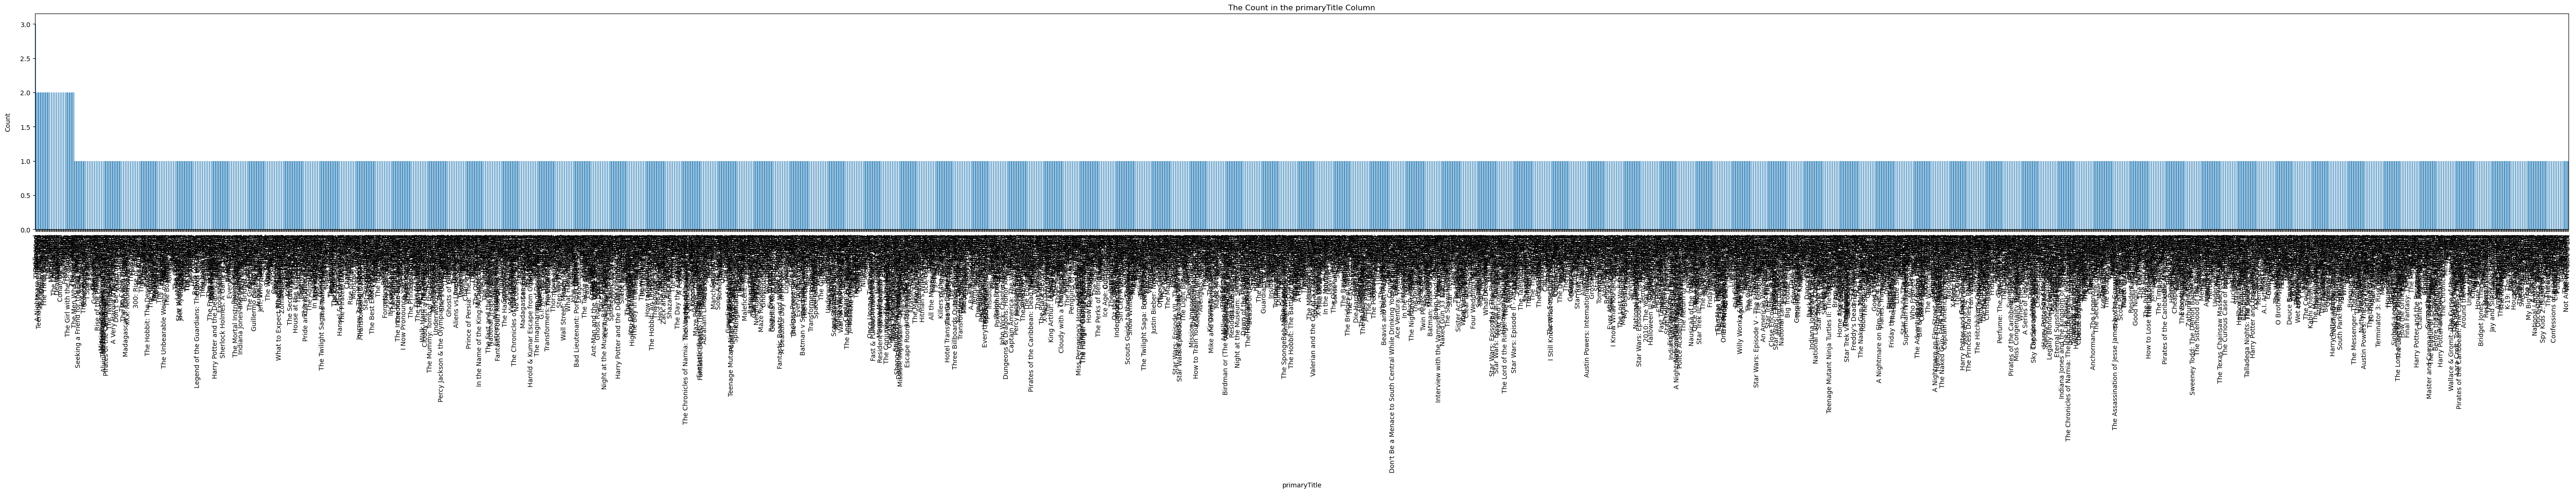

In [260]:
makeBarValueCount(data,categorical[0])

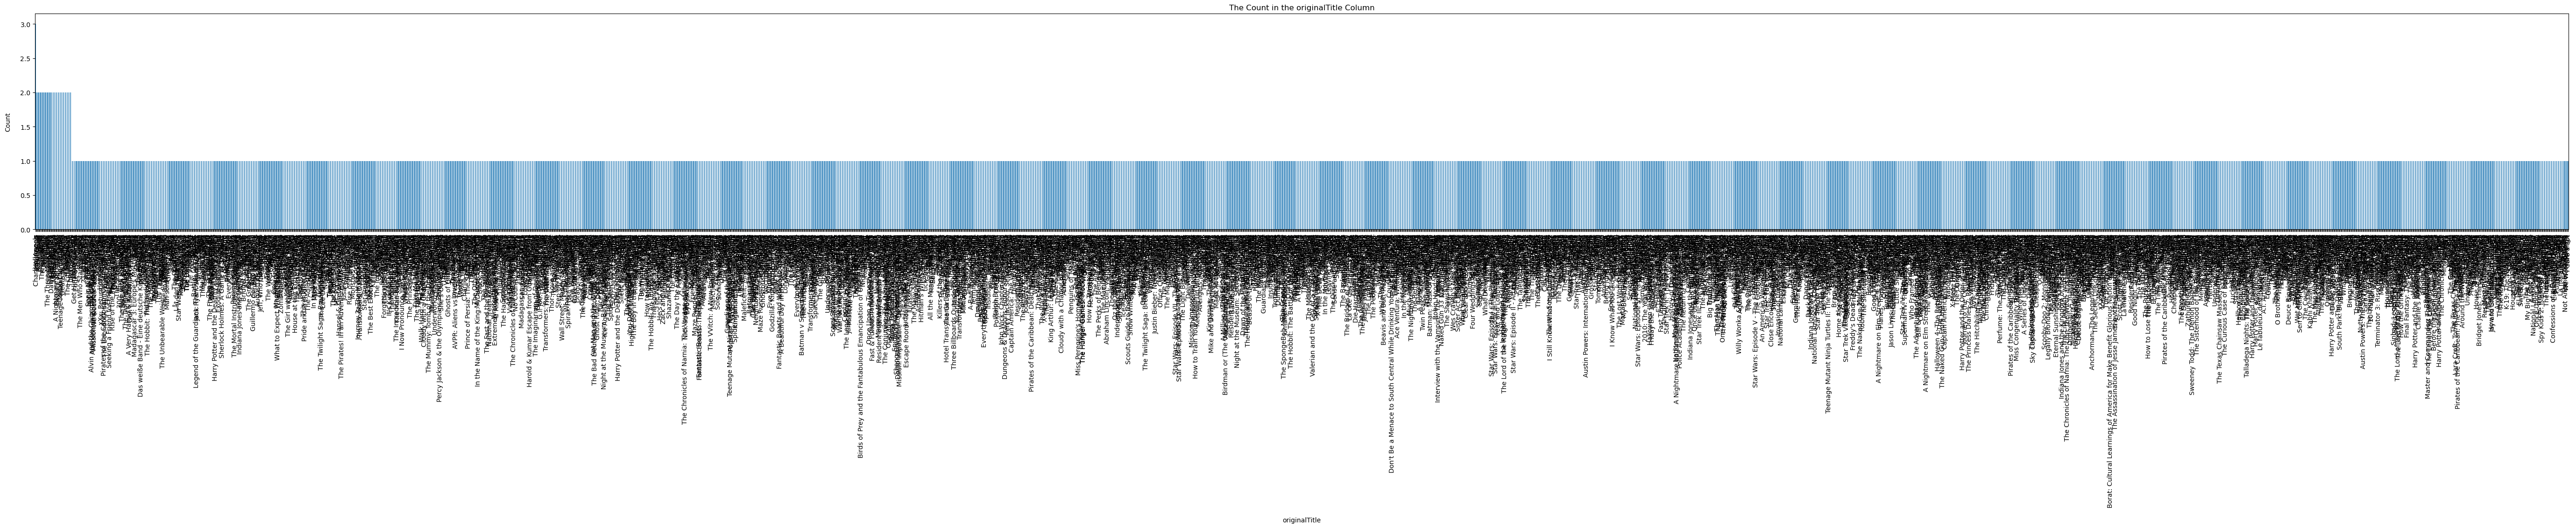

In [261]:
makeBarValueCount(data,categorical[1])

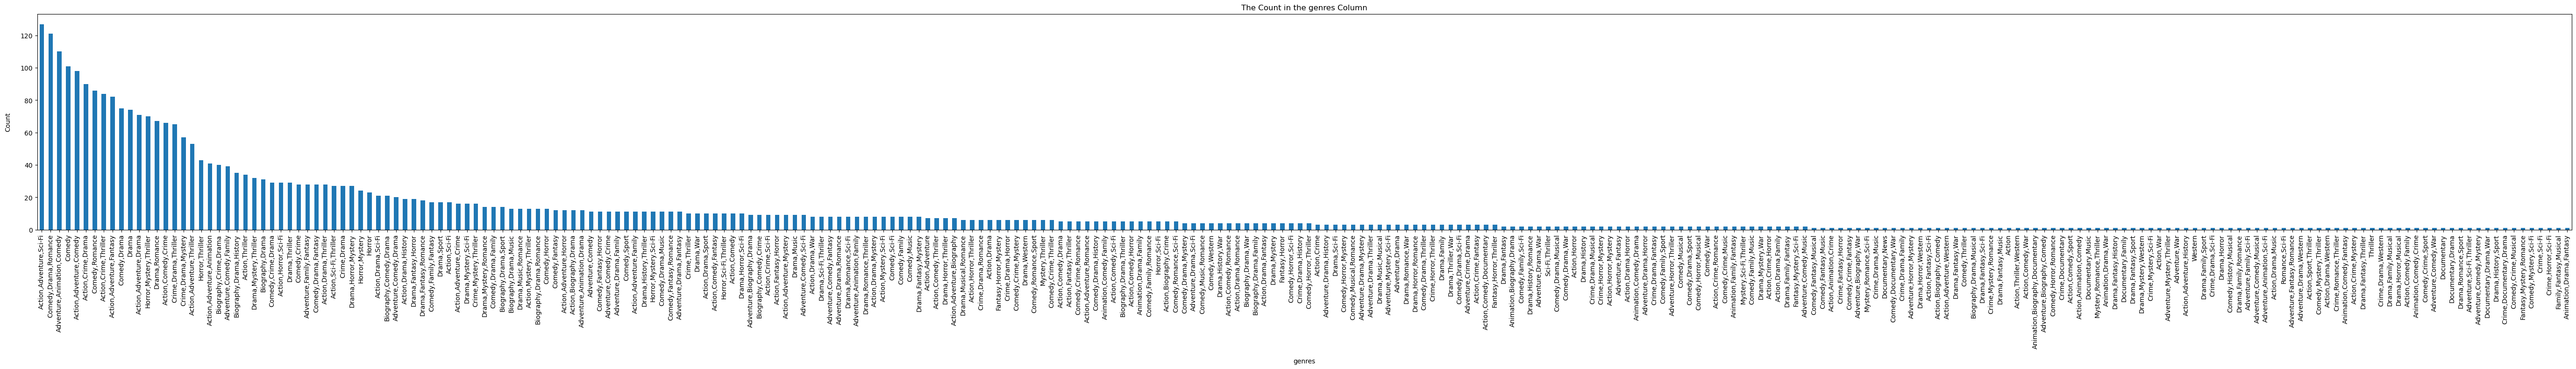

In [262]:
makeBarValueCount(data,categorical[2])

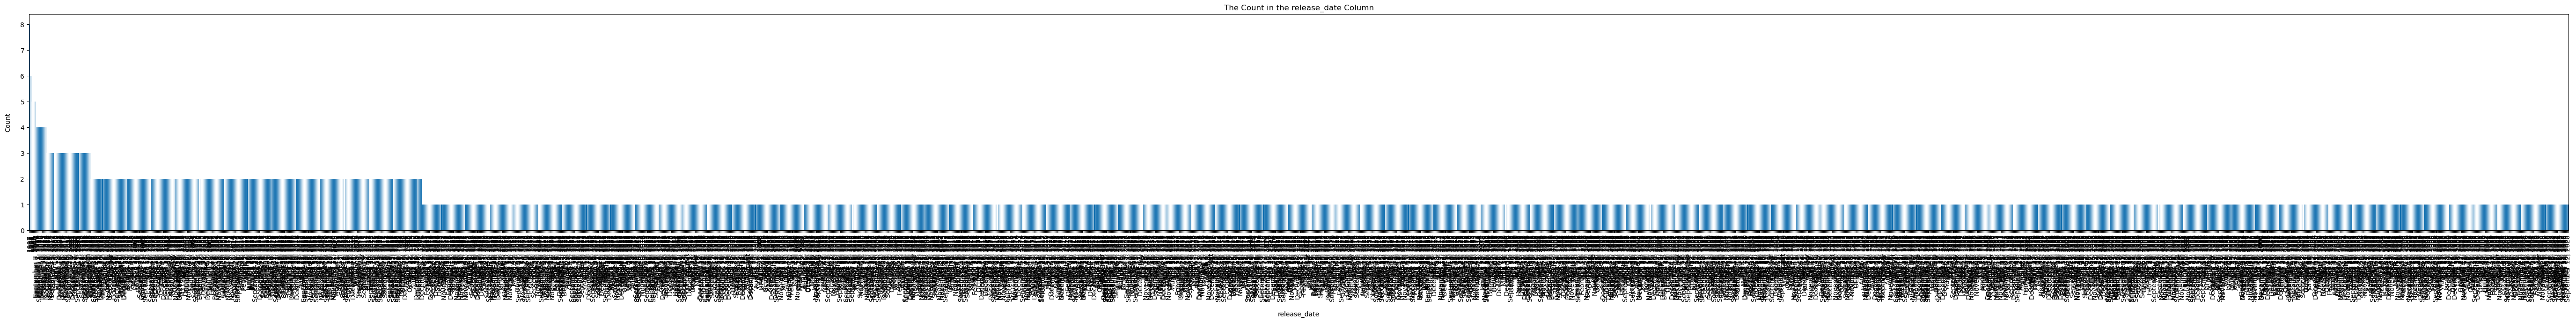

In [263]:
makeBarValueCount(data,categorical[3])

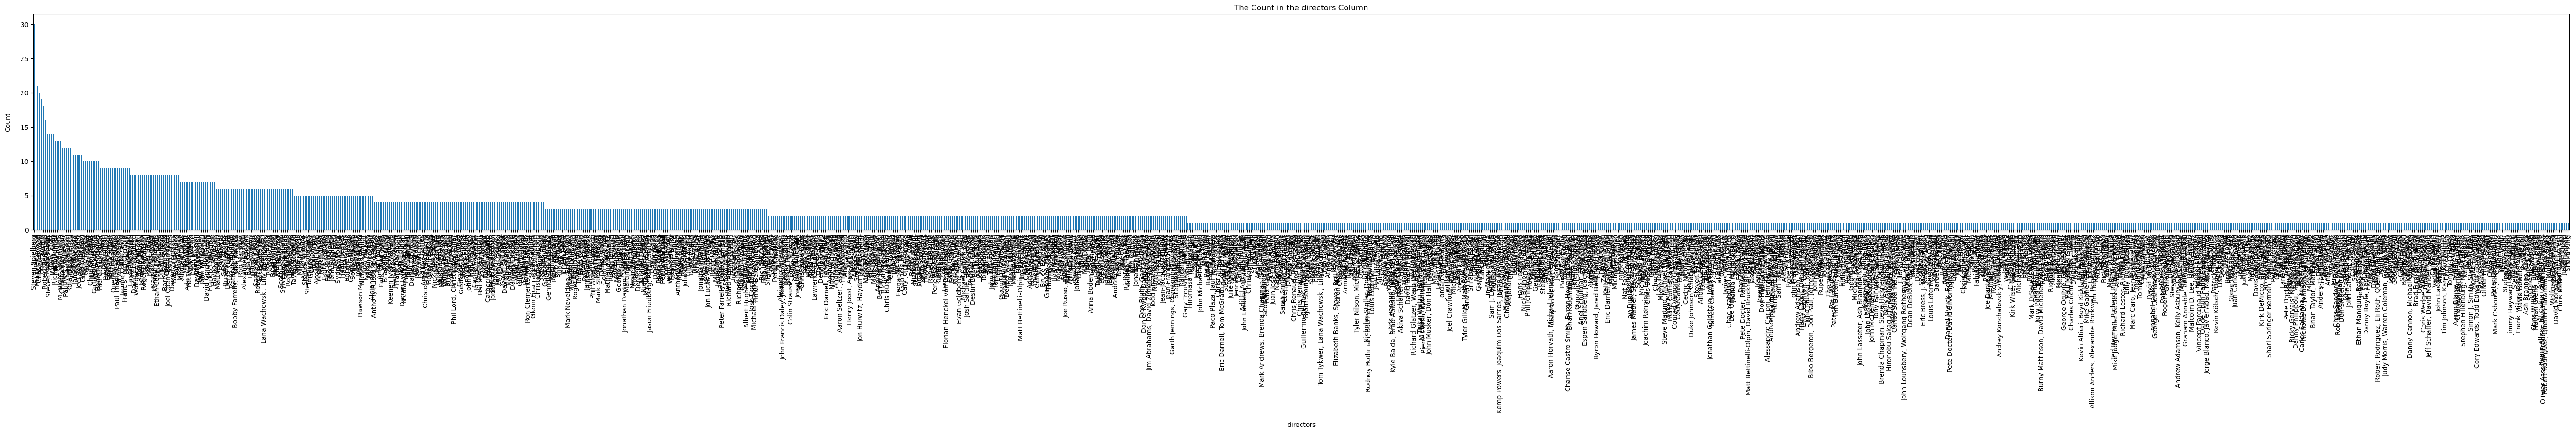

In [264]:
makeBarValueCount(data,categorical[4])

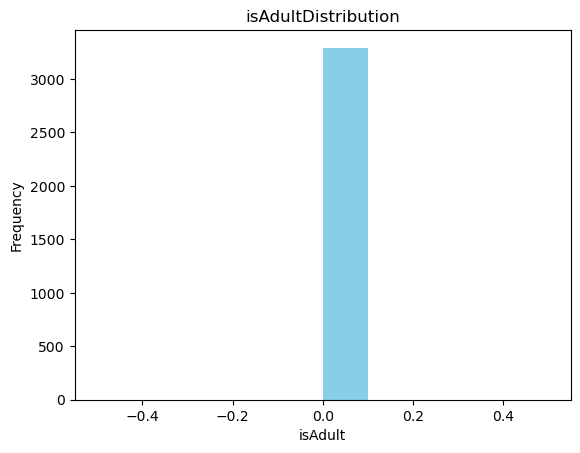

In [265]:
plt.hist(data[numerical[0]], bins=10, color='skyblue')

plt.xlabel(numerical[0])
plt.ylabel('Frequency')
plt.title(numerical[0] + "Distribution")

# Showing the plot
plt.show()

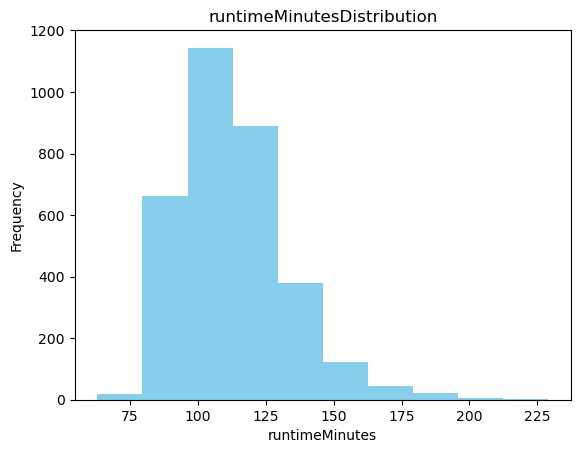

In [266]:
plt.hist(data[numerical[1]], bins=10, color='skyblue')

plt.xlabel(numerical[1])
plt.ylabel('Frequency')
plt.title(numerical[1] + "Distribution")

# Showing the plot
plt.show()

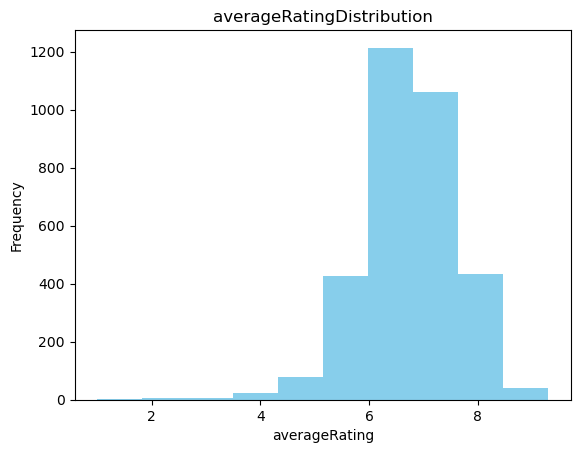

In [267]:
plt.hist(data[numerical[2]], bins=10, color='skyblue')

plt.xlabel(numerical[2])
plt.ylabel('Frequency')
plt.title(numerical[2] + "Distribution")

# Showing the plot
plt.show()

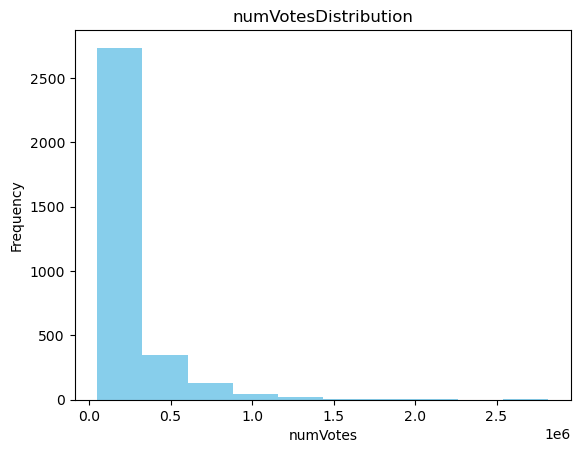

In [268]:
plt.hist(data[numerical[3]], bins=10, color='skyblue')

plt.xlabel(numerical[3])
plt.ylabel('Frequency')
plt.title(numerical[3] + "Distribution")

# Showing the plot
plt.show()

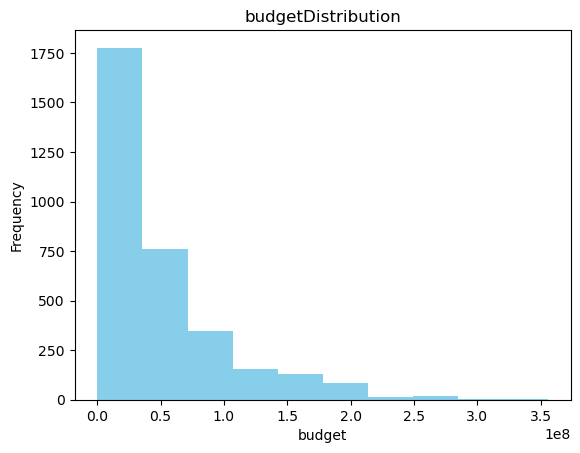

In [269]:
plt.hist(data[numerical[4]], bins=10, color='skyblue')

plt.xlabel(numerical[4])
plt.ylabel('Frequency')
plt.title(numerical[4] + "Distribution")

# Showing the plot
plt.show()

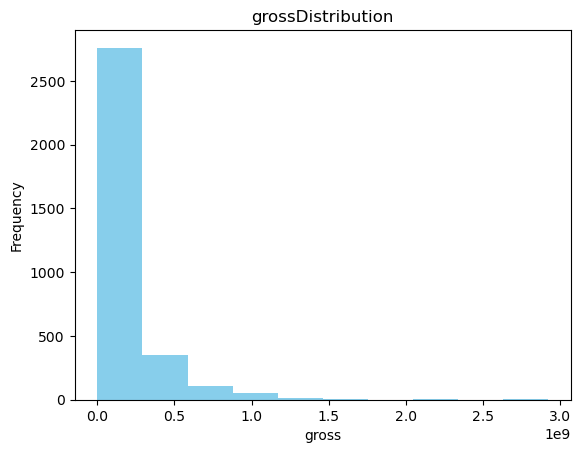

In [270]:
plt.hist(data[numerical[5]], bins=10, color='skyblue')

plt.xlabel(numerical[5])
plt.ylabel('Frequency')
plt.title(numerical[5] + "Distribution")

# Showing the plot
plt.show()

In [271]:
# Function to extract unique values
def get_unique_values(df, column):
    unique_values = set()
    for value in df[column]:
        if ',' in value:
            unique_values.update(value.split(','))
        else:
            unique_values.add(value)
    return unique_values


get_unique_values(data, categorical[2])

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [272]:
def getLabelList(n):
    labelList = []
    for i in range(n):
        labelList.append(i)
    return labelList


categorical

['primaryTitle', 'originalTitle', 'genres', 'release_date', 'directors']

In [273]:
#pTitles = get_unique_values(data, categorical[0])
#oTitles = get_unique_values(data, categorical[1])
genres = get_unique_values(data, categorical[2])
#dates = get_unique_values(data, categorical[3])
#directors = get_unique_values(data, categorical[4])


In [274]:
#manual one hot set up
for i in genres:
    data[i] = 0

data.head()

display(data.isna().sum()) 

id                0
primaryTitle      0
originalTitle     0
isAdult           0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
budget            0
gross             0
release_date      0
directors         0
Music             0
Musical           0
News              0
Sport             0
Family            0
Comedy            0
Western           0
Mystery           0
Romance           0
Animation         0
Crime             0
Fantasy           0
Horror            0
Thriller          0
Documentary       0
Biography         0
Drama             0
War               0
History           0
Sci-Fi            0
Adventure         0
Action            0
dtype: int64

In [275]:
for index, row in data.iterrows():
    genres = row['genres'].split(',')
    for genre in genres:
        data.at[index, genre.strip()] = 1

data.drop(columns=['genres'], inplace=True)  
#display(data.isna().sum()) 


In [276]:
data.drop(columns=['id'], inplace=True)
c = data.columns.tolist()
display(c)

if 'NaN' in c:
    print('its here')
else:
    print('nah')    

['primaryTitle',
 'originalTitle',
 'isAdult',
 'runtimeMinutes',
 'averageRating',
 'numVotes',
 'budget',
 'gross',
 'release_date',
 'directors',
 'Music',
 'Musical',
 'News',
 'Sport',
 'Family',
 'Comedy',
 'Western',
 'Mystery',
 'Romance',
 'Animation',
 'Crime',
 'Fantasy',
 'Horror',
 'Thriller',
 'Documentary',
 'Biography',
 'Drama',
 'War',
 'History',
 'Sci-Fi',
 'Adventure',
 'Action']

nah


In [277]:
data = data.dropna()
#display(data.isna().sum())
data.isna() 

primaryTitle  originalTitle  isAdult  runtimeMinutes  averageRating  \
0            False          False    False           False          False   
1            False          False    False           False          False   
2            False          False    False           False          False   
3            False          False    False           False          False   
4            False          False    False           False          False   
...            ...            ...      ...             ...            ...   
3343         False          False    False           False          False   
3344         False          False    False           False          False   
3345         False          False    False           False          False   
3346         False          False    False           False          False   
3347         False          False    False           False          False   

      numVotes  budget  gross  release_date  directors  ...  Horror  Thriller  \
0        False   False  False         False      False  ...   False     False   
1        False   False  False         False      False  ...   False     False   
2        False   False  False         False      False  ...   False     False   
3        False   False  False         False      False  ...   False     False   
4        False   False  False         False      False  ...   False     False   
...        ...     ...    ...           ...        ...  ...     ...       ...   
3343     False   False  False         False      False  ...   False     False   
3344     False   False  False         False      False  ...   False     False   
3345     False   False  False         False      False  ...   False     False   
3346     False   False  False         False      False  ...   False     False   
3347     False   False  False         False      False  ...   False     False   

      Documentary  Biography  Drama    War  History  Sci-Fi  Adventure  Action  
0           False      False  False  False    False   False      False   False  
1           False      False  False  False    False   False      False   False  
2           False      False  False  False    False   False      False   False  
3           False      False  False  False    False   False      False   False  
4           False      False  False  False    False   False      False   False  
...           ...        ...    ...    ...      ...     ...        ...     ...  
3343        False      False  False  False    False   False      False   False  
3344        False      False  False  False    False   False      False   False  
3345        False      False  False  False    False   False      False   False  
3346        False      False  False  False    False   False      False   False  
3347        False      False  False  False    False   False      False   False  

[3292 rows x 32 columns]

In [278]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
encoder = OneHotEncoder(sparse=False)

#perform one-hot encoding on 'Country' column 
encodedData = encoder.fit_transform(data[[categorical[0]]])

encoder.categories_

oneHotDF = pd.DataFrame(encodedData, columns=encoder.categories_)
oneHotDF.columns = oneHotDF.columns.get_level_values(0)
oneHotDF.head()



cleanData = pd.concat([data, oneHotDF], axis=1).drop(columns = categorical[0])

data = cleanData
data.head() 



c:\Users\SA\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


originalTitle  isAdult  runtimeMinutes  averageRating  numVotes  \
0  Kate & Leopold      0.0           118.0            6.4   87925.0   
1  The AristoCats      0.0            78.0            7.1  111758.0   
2  Kelly's Heroes      0.0           144.0            7.6   52628.0   
3         M*A*S*H      0.0           116.0            7.4   75784.0   
4          Patton      0.0           172.0            7.9  106476.0   

       budget       gross       release_date              directors  Music  \
0  48000000.0  76019048.0  December 11, 2001          James Mangold    0.0   
1   4000000.0  35459543.0  December 11, 1970    Wolfgang Reitherman    0.0   
2   4000000.0   5200000.0    January 1, 1970        Brian G. Hutton    0.0   
3   3500000.0  81600000.0   January 25, 1970          Robert Altman    0.0   
4  12000000.0  61749765.0   February 4, 1970  Franklin J. Schaffner    0.0   

   ...  Zoolander  Zoolander 2  Zootopia  [Rec]²  eXistenZ  \
0  ...        0.0          0.0       0.0     0.0       0.0   
1  ...        0.0          0.0       0.0     0.0       0.0   
2  ...        0.0          0.0       0.0     0.0       0.0   
3  ...        0.0          0.0       0.0     0.0       0.0   
4  ...        0.0          0.0       0.0     0.0       0.0   

   tick, tick... BOOM!  xXx  xXx: Return of Xander Cage  \
0                  0.0  0.0                         0.0   
1                  0.0  0.0                         0.0   
2                  0.0  0.0                         0.0   
3                  0.0  0.0                         0.0   
4                  0.0  0.0                         0.0   

   xXx: State of the Union  Æon Flux  
0                      0.0       0.0  
1                      0.0       0.0  
2                      0.0       0.0  
3                      0.0       0.0  
4                      0.0       0.0  

[5 rows x 3272 columns]

In [279]:

data.isna()
display(data.isna().sum()) 

originalTitle                 52
isAdult                       52
runtimeMinutes                52
averageRating                 52
numVotes                      52
                              ..
tick, tick... BOOM!           52
xXx                           52
xXx: Return of Xander Cage    52
xXx: State of the Union       52
Æon Flux                      52
Length: 3272, dtype: int64

In [280]:
data = data.dropna()
display(data.isna().sum()) 

originalTitle                 0
isAdult                       0
runtimeMinutes                0
averageRating                 0
numVotes                      0
                             ..
tick, tick... BOOM!           0
xXx                           0
xXx: Return of Xander Cage    0
xXx: State of the Union       0
Æon Flux                      0
Length: 3272, dtype: int64

In [281]:
data.isna()


originalTitle  isAdult  runtimeMinutes  averageRating  numVotes  budget  \
0             False    False           False          False     False   False   
1             False    False           False          False     False   False   
2             False    False           False          False     False   False   
3             False    False           False          False     False   False   
4             False    False           False          False     False   False   
...             ...      ...             ...            ...       ...     ...   
3284          False    False           False          False     False   False   
3287          False    False           False          False     False   False   
3288          False    False           False          False     False   False   
3289          False    False           False          False     False   False   
3290          False    False           False          False     False   False   

      gross  release_date  directors  Music  ...  Zoolander  Zoolander 2  \
0     False         False      False  False  ...      False        False   
1     False         False      False  False  ...      False        False   
2     False         False      False  False  ...      False        False   
3     False         False      False  False  ...      False        False   
4     False         False      False  False  ...      False        False   
...     ...           ...        ...    ...  ...        ...          ...   
3284  False         False      False  False  ...      False        False   
3287  False         False      False  False  ...      False        False   
3288  False         False      False  False  ...      False        False   
3289  False         False      False  False  ...      False        False   
3290  False         False      False  False  ...      False        False   

      Zootopia  [Rec]²  eXistenZ  tick, tick... BOOM!    xXx  \
0        False   False     False                False  False   
1        False   False     False                False  False   
2        False   False     False                False  False   
3        False   False     False                False  False   
4        False   False     False                False  False   
...        ...     ...       ...                  ...    ...   
3284     False   False     False                False  False   
3287     False   False     False                False  False   
3288     False   False     False                False  False   
3289     False   False     False                False  False   
3290     False   False     False                False  False   

      xXx: Return of Xander Cage  xXx: State of the Union  Æon Flux  
0                          False                    False     False  
1                          False                    False     False  
2                          False                    False     False  
3                          False                    False     False  
4                          False                    False     False  
...                          ...                      ...       ...  
3284                       False                    False     False  
3287                       False                    False     False  
3288                       False                    False     False  
3289                       False                    False     False  
3290                       False                    False     False  

[3240 rows x 3272 columns]

In [282]:
#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
encoder = OneHotEncoder(sparse=False)

#perform one-hot encoding on 'Country' column 
encodedData = encoder.fit_transform(data[[categorical[1]]].dropna())

encoder.categories_

oneHotDF = pd.DataFrame(encodedData, columns=encoder.categories_)
oneHotDF.columns = oneHotDF.columns.get_level_values(0)
oneHotDF.head()



cleanData = pd.concat([data, oneHotDF], axis=1).drop(columns = categorical[1])

data = cleanData
data = data.dropna()
data.head() 

c:\Users\SA\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


isAdult  runtimeMinutes  averageRating  numVotes      budget       gross  \
0      0.0           118.0            6.4   87925.0  48000000.0  76019048.0   
1      0.0            78.0            7.1  111758.0   4000000.0  35459543.0   
2      0.0           144.0            7.6   52628.0   4000000.0   5200000.0   
3      0.0           116.0            7.4   75784.0   3500000.0  81600000.0   
4      0.0           172.0            7.9  106476.0  12000000.0  61749765.0   

        release_date              directors  Music  Musical  ...  Zoolander  \
0  December 11, 2001          James Mangold    0.0      0.0  ...        0.0   
1  December 11, 1970    Wolfgang Reitherman    0.0      0.0  ...        0.0   
2    January 1, 1970        Brian G. Hutton    0.0      0.0  ...        0.0   
3   January 25, 1970          Robert Altman    0.0      0.0  ...        0.0   
4   February 4, 1970  Franklin J. Schaffner    0.0      0.0  ...        0.0   

   Zoolander 2  Zootopia  Zwartboek  [Rec]²  eXistenZ  xXx  \
0          0.0       0.0        0.0     0.0       0.0  0.0   
1          0.0       0.0        0.0     0.0       0.0  0.0   
2          0.0       0.0        0.0     0.0       0.0  0.0   
3          0.0       0.0        0.0     0.0       0.0  0.0   
4          0.0       0.0        0.0     0.0       0.0  0.0   

   xXx: Return of Xander Cage  xXx: State of the Union  Æon Flux  
0                         0.0                      0.0       0.0  
1                         0.0                      0.0       0.0  
2                         0.0                      0.0       0.0  
3                         0.0                      0.0       0.0  
4                         0.0                      0.0       0.0  

[5 rows x 6465 columns]

In [283]:
#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
encoder = OneHotEncoder(sparse=False)

#perform one-hot encoding on 'Country' column 
encodedData = encoder.fit_transform(data[[categorical[3]]].dropna())

encoder.categories_

oneHotDF = pd.DataFrame(encodedData, columns=encoder.categories_)
oneHotDF.columns = oneHotDF.columns.get_level_values(0)
oneHotDF.head()



cleanData = pd.concat([data, oneHotDF], axis=1).drop(columns = categorical[3])

data = cleanData
data = data.dropna()
data.head() 

c:\Users\SA\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


isAdult  runtimeMinutes  averageRating  numVotes      budget       gross  \
0      0.0           118.0            6.4   87925.0  48000000.0  76019048.0   
1      0.0            78.0            7.1  111758.0   4000000.0  35459543.0   
2      0.0           144.0            7.6   52628.0   4000000.0   5200000.0   
3      0.0           116.0            7.4   75784.0   3500000.0  81600000.0   
4      0.0           172.0            7.9  106476.0  12000000.0  61749765.0   

               directors  Music  Musical  News  ...  September 9, 2007  \
0          James Mangold    0.0      0.0   0.0  ...                0.0   
1    Wolfgang Reitherman    0.0      0.0   0.0  ...                0.0   
2        Brian G. Hutton    0.0      0.0   0.0  ...                0.0   
3          Robert Altman    0.0      0.0   0.0  ...                0.0   
4  Franklin J. Schaffner    0.0      0.0   0.0  ...                0.0   

   September 9, 2008  September 9, 2010  September 9, 2011  September 9, 2012  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   September 9, 2013  September 9, 2016  September 9, 2017  September 9, 2018  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   September 9, 2019  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 9156 columns]

In [284]:
#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
encoder = OneHotEncoder(sparse=False)

#perform one-hot encoding on 'Country' column 
encodedData = encoder.fit_transform(data[[categorical[4]]].dropna())

encoder.categories_

oneHotDF = pd.DataFrame(encodedData, columns=encoder.categories_)
oneHotDF.columns = oneHotDF.columns.get_level_values(0)
oneHotDF.head()



cleanData = pd.concat([data, oneHotDF], axis=1).drop(columns = categorical[4])

data = cleanData
data.head() 

c:\Users\SA\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


isAdult  runtimeMinutes  averageRating  numVotes      budget       gross  \
0      0.0           118.0            6.4   87925.0  48000000.0  76019048.0   
1      0.0            78.0            7.1  111758.0   4000000.0  35459543.0   
2      0.0           144.0            7.6   52628.0   4000000.0   5200000.0   
3      0.0           116.0            7.4   75784.0   3500000.0  81600000.0   
4      0.0           172.0            7.9  106476.0  12000000.0  61749765.0   

   Music  Musical  News  Sport  ...  Xavier Gens  Yarrow Cheney, Scott Mosier  \
0    0.0      0.0   0.0    0.0  ...          0.0                          0.0   
1    0.0      0.0   0.0    0.0  ...          0.0                          0.0   
2    0.0      0.0   0.0    0.0  ...          0.0                          0.0   
3    0.0      0.0   0.0    0.0  ...          0.0                          0.0   
4    0.0      0.0   0.0    0.0  ...          0.0                          0.0   

   Yash Chopra  Yimou Zhang  Yorgos Lanthimos  Zach Braff  Zach Cregger  \
0          0.0          0.0               0.0         0.0           0.0   
1          0.0          0.0               0.0         0.0           0.0   
2          0.0          0.0               0.0         0.0           0.0   
3          0.0          0.0               0.0         0.0           0.0   
4          0.0          0.0               0.0         0.0           0.0   

   Zack Snyder  Zal Batmanglij  Ömer Faruk Sorak  
0          0.0             0.0               0.0  
1          0.0             0.0               0.0  
2          0.0             0.0               0.0  
3          0.0             0.0               0.0  
4          0.0             0.0               0.0  

[5 rows x 10438 columns]

In [285]:
data.columns

Index(['isAdult', 'runtimeMinutes', 'averageRating', 'numVotes', 'budget',
       'gross', 'Music', 'Musical', 'News', 'Sport',
       ...
       'Xavier Gens', 'Yarrow Cheney, Scott Mosier', 'Yash Chopra',
       'Yimou Zhang', 'Yorgos Lanthimos', 'Zach Braff', 'Zach Cregger',
       'Zack Snyder', 'Zal Batmanglij', 'Ömer Faruk Sorak'],
      dtype='object', length=10438)

In [286]:
data = data.dropna()

In [287]:
data.columns

Index(['isAdult', 'runtimeMinutes', 'averageRating', 'numVotes', 'budget',
       'gross', 'Music', 'Musical', 'News', 'Sport',
       ...
       'Xavier Gens', 'Yarrow Cheney, Scott Mosier', 'Yash Chopra',
       'Yimou Zhang', 'Yorgos Lanthimos', 'Zach Braff', 'Zach Cregger',
       'Zack Snyder', 'Zal Batmanglij', 'Ömer Faruk Sorak'],
      dtype='object', length=10438)

In [288]:
def makeBox(aDF,colName):

    stud_bplt = aDF.boxplot(column = colName)


    stud_bplt.plot()

    plt.title('Box Plot of '+ colName)
    plt.xlabel('X-axis Label')
    plt.ylabel('Y-axis Label')

    plt.show()

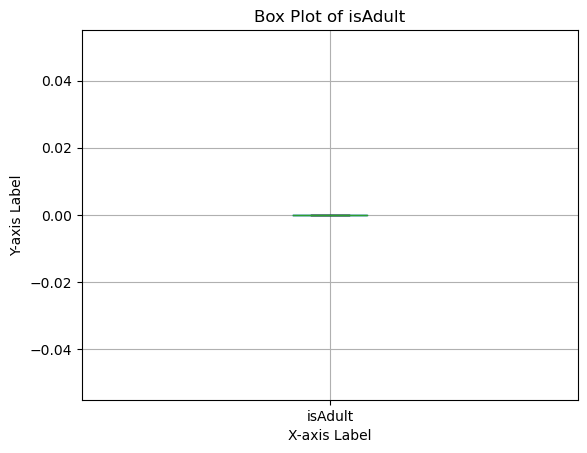

In [289]:
makeBox(data,numerical[0])

# plt.boxplot(data[numerical[0]])

# plt.title('Box Plot of '+ numerical[0])
# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')

# plt.show()



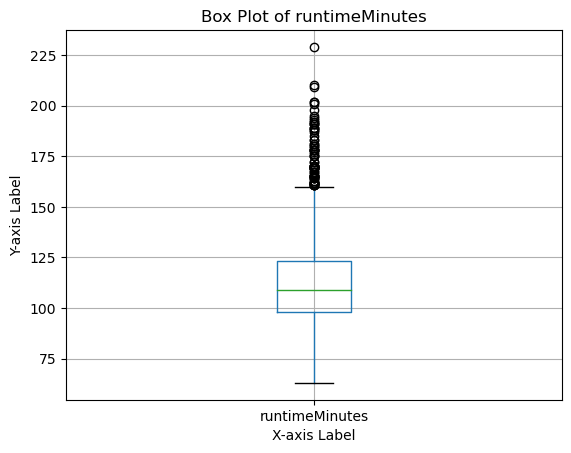

In [290]:
makeBox(data,numerical[1])



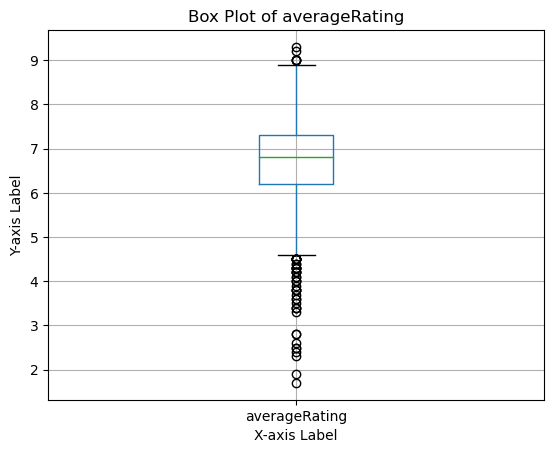

In [291]:
makeBox(data,numerical[2])

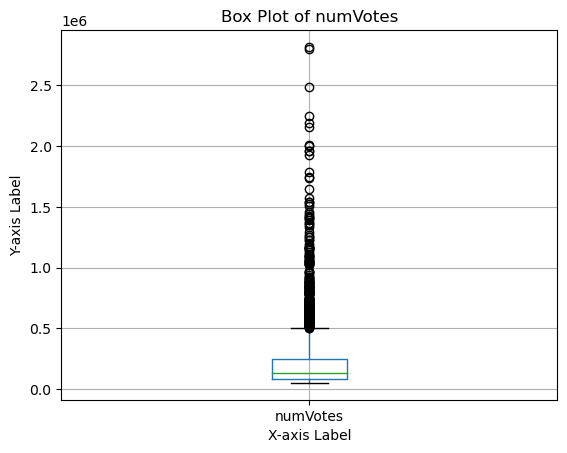

In [292]:
makeBox(data,numerical[3])

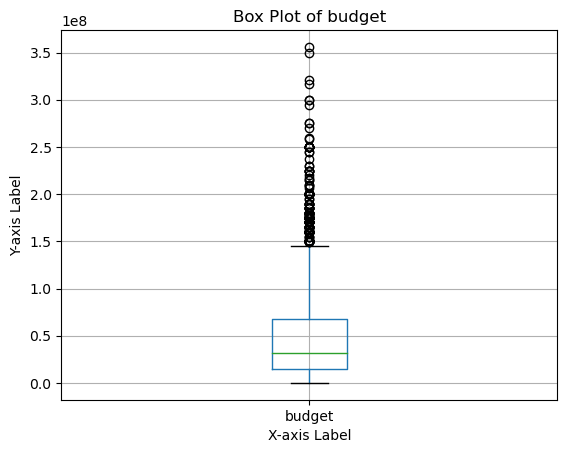

In [293]:
makeBox(data,numerical[4])

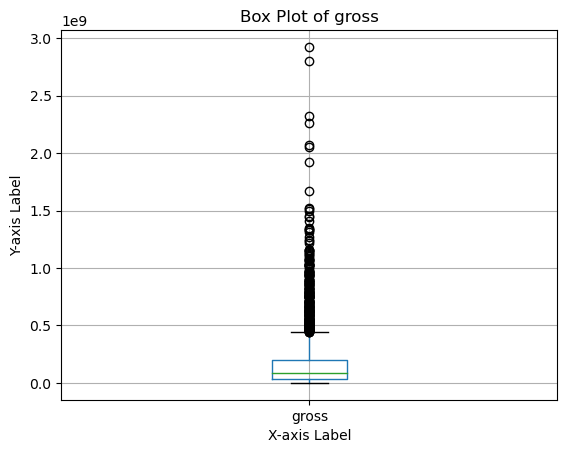

In [294]:
makeBox(data,numerical[5])

In [295]:
import numpy as np
from scipy import stats


In [296]:
numerical

['isAdult', 'runtimeMinutes', 'averageRating', 'numVotes', 'budget', 'gross']

In [297]:
# NOTE: on newer version of numpy, interpolation is replaced with method:
# Q1 = np.percentile(outlierDF['Salary'], 25, method='midpoint')
# Q3 = np.percentile(outlierDF['Salary'], 75, method='midpoint')

# Q1 = np.percentile(data[numerical[2]], 25, method='midpoint')
# Q3 = np.percentile(data[numerical[2]], 75, method='midpoint')
# IQR = Q3 - Q1

# IQR
# maxThreshold = Q3+1.5*IQR
# minThreshold = Q1-1.5*IQR

# iqrDF = data[data[numerical[2]] < maxThreshold]
# iqrDF = iqrDF[iqrDF[numerical[2]] > minThreshold]

# iqrDF.tail()
#makeBox(iqrDF,numerical[2])

def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

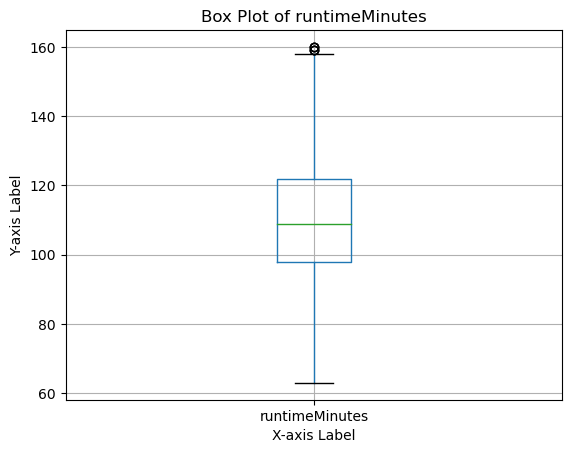

In [298]:
data = remove_outliers(data, numerical[1])
makeBox(data,numerical[1])

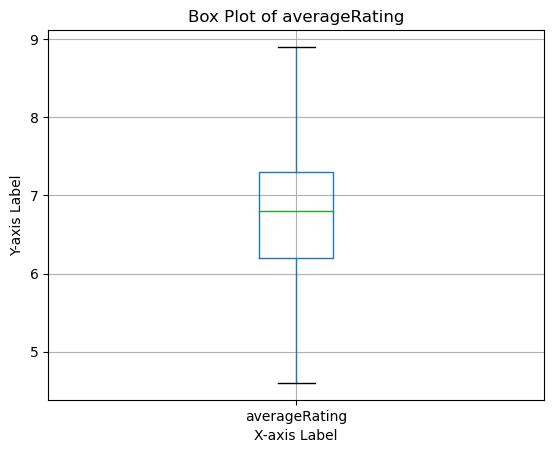

In [299]:
data = remove_outliers(data, numerical[2])
makeBox(data,numerical[2])

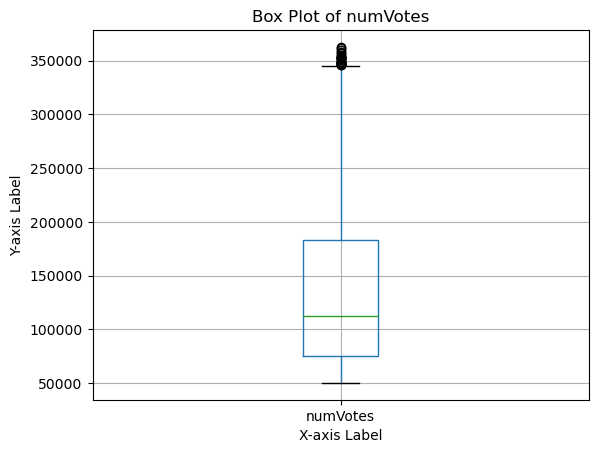

In [300]:
data = remove_outliers(data, numerical[3])
#makeBox(data,numerical[3])

data = remove_outliers(data, numerical[3])
#makeBox(data,numerical[3])

data = remove_outliers(data, numerical[3])
makeBox(data,numerical[3])

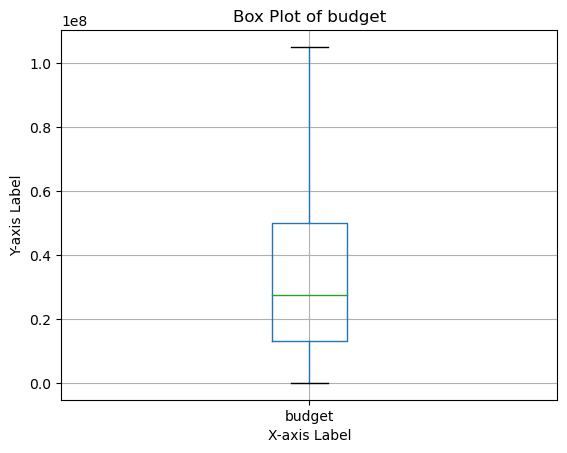

In [301]:
data = remove_outliers(data, numerical[4])
#makeBox(data,numerical[4])

data = remove_outliers(data, numerical[4])
makeBox(data,numerical[4])

In [302]:
# normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# initialize the DF
normalizedDF = data

normalizedDF[numerical] = scaler.fit_transform(data[numerical])

normalizedDF.head()
#data.head()

isAdult  runtimeMinutes  averageRating  numVotes    budget     gross  \
0      0.0        0.567010       0.461538  0.121230  0.457112  0.065565   
1      0.0        0.154639       0.641026  0.197421  0.038040  0.030583   
2      0.0        0.835052       0.769231  0.008389  0.038040  0.004485   
3      0.0        0.546392       0.717949  0.082416  0.033278  0.070378   
5      0.0        0.237113       0.512821  0.012474  0.007343  0.002102   

   Music  Musical  News  Sport  ...  Xavier Gens  Yarrow Cheney, Scott Mosier  \
0    0.0      0.0   0.0    0.0  ...          0.0                          0.0   
1    0.0      0.0   0.0    0.0  ...          0.0                          0.0   
2    0.0      0.0   0.0    0.0  ...          0.0                          0.0   
3    0.0      0.0   0.0    0.0  ...          0.0                          0.0   
5    0.0      0.0   0.0    0.0  ...          0.0                          0.0   

   Yash Chopra  Yimou Zhang  Yorgos Lanthimos  Zach Braff  Zach Cregger  \
0          0.0          0.0               0.0         0.0           0.0   
1          0.0          0.0               0.0         0.0           0.0   
2          0.0          0.0               0.0         0.0           0.0   
3          0.0          0.0               0.0         0.0           0.0   
5          0.0          0.0               0.0         0.0           0.0   

   Zack Snyder  Zal Batmanglij  Ömer Faruk Sorak  
0          0.0             0.0               0.0  
1          0.0             0.0               0.0  
2          0.0             0.0               0.0  
3          0.0             0.0               0.0  
5          0.0             0.0               0.0  

[5 rows x 10438 columns]

In [303]:

data.isna()

isAdult  runtimeMinutes  averageRating  numVotes  budget  gross  Music  \
0       False           False          False     False   False  False  False   
1       False           False          False     False   False  False  False   
2       False           False          False     False   False  False  False   
3       False           False          False     False   False  False  False   
5       False           False          False     False   False  False  False   
...       ...             ...            ...       ...     ...    ...    ...   
3146    False           False          False     False   False  False  False   
3147    False           False          False     False   False  False  False   
3148    False           False          False     False   False  False  False   
3149    False           False          False     False   False  False  False   
3150    False           False          False     False   False  False  False   

      Musical   News  Sport  ...  Xavier Gens  Yarrow Cheney, Scott Mosier  \
0       False  False  False  ...        False                        False   
1       False  False  False  ...        False                        False   
2       False  False  False  ...        False                        False   
3       False  False  False  ...        False                        False   
5       False  False  False  ...        False                        False   
...       ...    ...    ...  ...          ...                          ...   
3146    False  False  False  ...        False                        False   
3147    False  False  False  ...        False                        False   
3148    False  False  False  ...        False                        False   
3149    False  False  False  ...        False                        False   
3150    False  False  False  ...        False                        False   

      Yash Chopra  Yimou Zhang  Yorgos Lanthimos  Zach Braff  Zach Cregger  \
0           False        False             False       False         False   
1           False        False             False       False         False   
2           False        False             False       False         False   
3           False        False             False       False         False   
5           False        False             False       False         False   
...           ...          ...               ...         ...           ...   
3146        False        False             False       False         False   
3147        False        False             False       False         False   
3148        False        False             False       False         False   
3149        False        False             False       False         False   
3150        False        False             False       False         False   

      Zack Snyder  Zal Batmanglij  Ömer Faruk Sorak  
0           False           False             False  
1           False           False             False  
2           False           False             False  
3           False           False             False  
5           False           False             False  
...           ...             ...               ...  
3146        False           False             False  
3147        False           False             False  
3148        False           False             False  
3149        False           False             False  
3150        False           False             False  

[2355 rows x 10438 columns]

In [304]:
yDF = pd.DataFrame(data['budget'])
# xDF = StandardizedDF
yDF

budget
0     0.457112
1     0.038040
2     0.038040
3     0.033278
5     0.007343
...        ...
3146  0.761891
3147  0.142808
3148  0.666648
3149  0.161857
3150  0.409490

[2355 rows x 1 columns]

In [305]:
xDF = data.drop(columns=['budget'])
xDF

isAdult  runtimeMinutes  averageRating  numVotes     gross  Music  \
0         0.0        0.567010       0.461538  0.121230  0.065565    0.0   
1         0.0        0.154639       0.641026  0.197421  0.030583    0.0   
2         0.0        0.835052       0.769231  0.008389  0.004485    0.0   
3         0.0        0.546392       0.717949  0.082416  0.070378    0.0   
5         0.0        0.237113       0.512821  0.012474  0.002102    0.0   
...       ...             ...            ...       ...       ...    ...   
3146      0.0        0.247423       0.487179  0.096022  0.810412    0.0   
3147      0.0        0.474227       0.487179  0.311388  0.264430    0.0   
3148      0.0        0.484536       0.435897  0.594269  0.256843    0.0   
3149      0.0        0.484536       0.743590  0.232216  0.057544    0.0   
3150      0.0        0.536082       0.384615  0.001765  0.030329    0.0   

      Musical  News  Sport  Family  ...  Xavier Gens  \
0         0.0   0.0    0.0     0.0  ...          0.0   
1         0.0   0.0    0.0     0.0  ...          0.0   
2         0.0   0.0    0.0     0.0  ...          0.0   
3         0.0   0.0    0.0     0.0  ...          0.0   
5         0.0   0.0    0.0     0.0  ...          0.0   
...       ...   ...    ...     ...  ...          ...   
3146      0.0   0.0    0.0     0.0  ...          0.0   
3147      0.0   0.0    0.0     0.0  ...          0.0   
3148      0.0   0.0    0.0     0.0  ...          0.0   
3149      0.0   0.0    0.0     0.0  ...          0.0   
3150      0.0   0.0    0.0     0.0  ...          0.0   

      Yarrow Cheney, Scott Mosier  Yash Chopra  Yimou Zhang  Yorgos Lanthimos  \
0                             0.0          0.0          0.0               0.0   
1                             0.0          0.0          0.0               0.0   
2                             0.0          0.0          0.0               0.0   
3                             0.0          0.0          0.0               0.0   
5                             0.0          0.0          0.0               0.0   
...                           ...          ...          ...               ...   
3146                          0.0          0.0          0.0               0.0   
3147                          0.0          0.0          0.0               0.0   
3148                          0.0          0.0          0.0               0.0   
3149                          0.0          0.0          0.0               0.0   
3150                          0.0          0.0          0.0               0.0   

      Zach Braff  Zach Cregger  Zack Snyder  Zal Batmanglij  Ömer Faruk Sorak  
0            0.0           0.0          0.0             0.0               0.0  
1            0.0           0.0          0.0             0.0               0.0  
2            0.0           0.0          0.0             0.0               0.0  
3            0.0           0.0          0.0             0.0               0.0  
5            0.0           0.0          0.0             0.0               0.0  
...          ...           ...          ...             ...               ...  
3146         0.0           0.0          0.0             0.0               0.0  
3147         0.0           0.0          0.0             0.0               0.0  
3148         0.0           0.0          0.0             0.0               0.0  
3149         0.0           0.0          0.0             0.0               0.0  
3150         0.0           0.0          0.0             0.0               0.0  

[2355 rows x 10437 columns]

In [310]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xDF, yDF, test_size=0.30)

# Create and fit the linear regression model
model = LinearRegression().fit(xTrain, yTrain)

# Predict on the test set
preds = model.predict(xTest)

# Calculate mean squared error
print(r2_score(yTest, preds))
print(mean_squared_error(yTest,preds))
print(mean_absolute_error(yTest, preds))



0.43908109174787857
0.033255421563626625
0.13997069830648637


In [311]:
from sklearn.svm import SVR
model = SVR(kernel='rbf')  # 'rbf' kernel is commonly used for non-linear regression tasks

# Train the model
model.fit(xTrain, yTrain)

# Predict on the test set
pred = model.predict(xTest)

print(r2_score(yTest, pred))
print(mean_squared_error(yTest,pred))
print(mean_absolute_error(yTest, pred))


c:\Users\SA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.42050082537424804
0.03435699717808573
0.14992355357098017


In [312]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

# Train the model
model.fit(xTrain, yTrain)

# Predict on the test set
pred = model.predict(xTest)

print(r2_score(yTest, pred))
print(mean_squared_error(yTest,pred))
print(mean_absolute_error(yTest, pred))

0.14562181816061714
0.05065385779268935
0.16416709065533183


In [313]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', random_state=42)

# Train the model
model.fit(xTrain, yTrain)

# Predict on the test set
pred = model.predict(xTest)

print(r2_score(yTest, pred))
print(mean_squared_error(yTest,pred))
print(mean_absolute_error(yTest, pred))

c:\Users\SA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2300517513874346
0.04564822688822243
0.16703006217210742
